# Current config

I run `generate_plots.sh` daily at 9:30 AM.
However what happens if my PC is off at that time, will have to wait another uptime at 9:30 AM.

Solution is to move from cron to anacron.

From https://www.putorius.net/cron-vs-anacron.html:
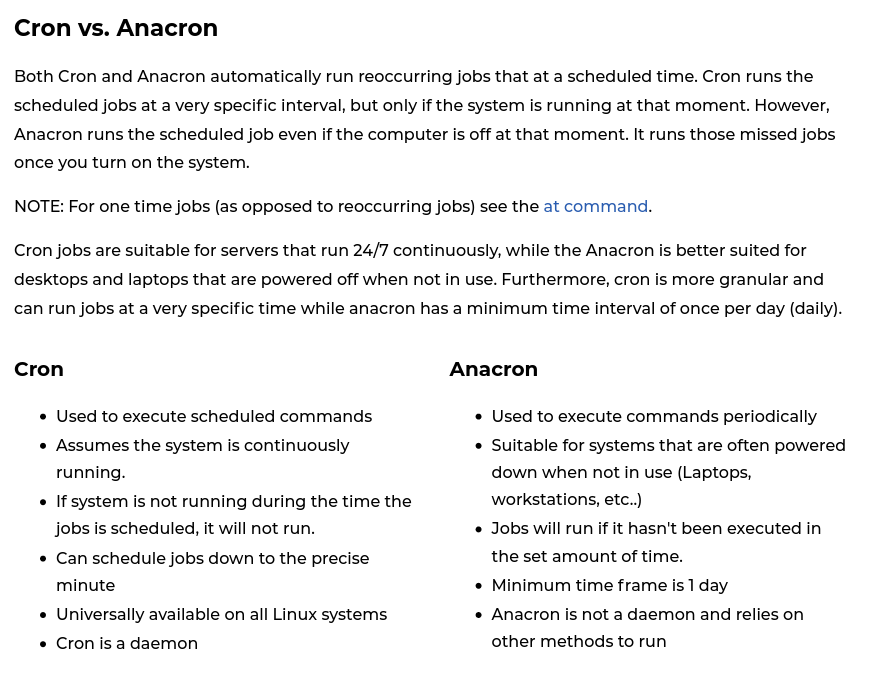

# Anacron as user

Anacron is already setup on ubuntu. Actually cron.daily is managed by anacron therefore everything under `/etc/cron.daily` is run even if your system was off at the time by crontab.

But it is true for root, and has to be setup for users.

I will follow these recommandations: https://askubuntu.com/a/235090

## .anacron folders

Create a `.anacron` folder in your home directory and in it two subfolders, `etc` and `spool`

In [1]:
!mkdir -p ~/.anacron/{etc,spool}

## anacrontab

Create a new file `~/.anacron/etc/anacrontab` with the following content:

``` bash
# ~/.anacron/etc/anacrontab: configuration file for anacron

# See anacron(8) and anacrontab(5) for details.

SHELL=/bin/bash
PATH=/usr/local/sbin:/usr/local/bin:/sbin:/bin:/usr/sbin:/usr/bin:/home/explore/miniconda3/bin:/home/explore/miniconda3/condabin:/home/explore/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin

# period  delay  job-identifier  command
1         10     squeezebox         ~/git/guillaume/squeezebox/generate_plots.sh
``` 

## start anacron

Add the following line to your crontab using `crontab -e`:

``` bash
@hourly /usr/sbin/anacron -s -t $HOME/.anacron/etc/anacrontab -S $HOME/.anacron/spool
```

And remove squeezebox entry from crontab.

In [2]:
!crontab -l

# NVIDIA SDK Manager updater
# NVIDIA SDK Manager updater
0 12 */7 * * /bin/bash /home/explore/.nvsdkm/.updater/updater.sh
#30 9 * * * ~/git/guillaume/squeezebox/generate_plots.sh
@hourly /usr/sbin/anacron -s -t $HOME/.anacron/etc/anacrontab -S $HOME/.anacron/spool
